# PROJECT

# TITANIC DATASET

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [82]:
data=pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [84]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

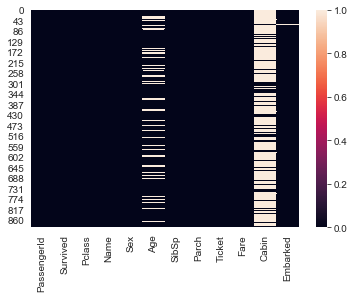

In [86]:
sns.heatmap(data.isnull())

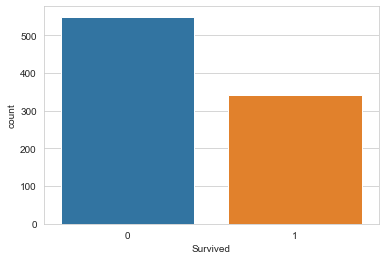

In [87]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data)

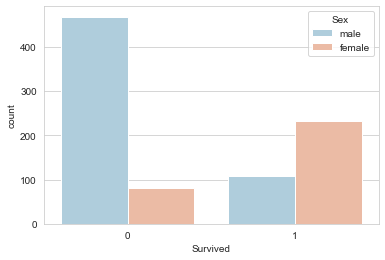

In [88]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=data,palette="RdBu_r")

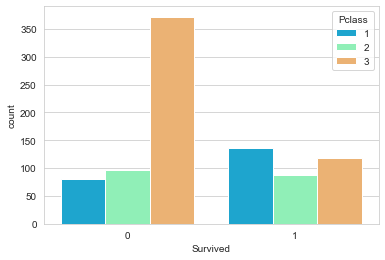

In [89]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=data,palette="rainbow")

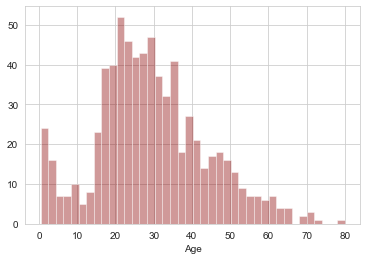

In [90]:
sns.distplot(data["Age"].dropna(),kde=False,color="darkred",bins=40)

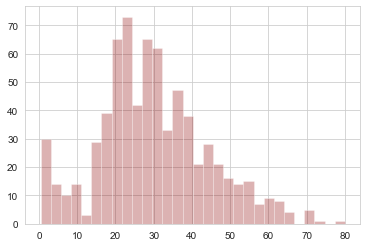

In [91]:
data["Age"].hist(bins=30,color="darkred",alpha=0.3)

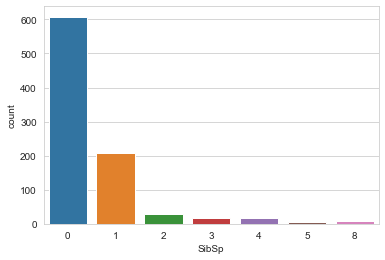

In [92]:
sns.countplot(x="SibSp",data=data)

# DATA CLEANING

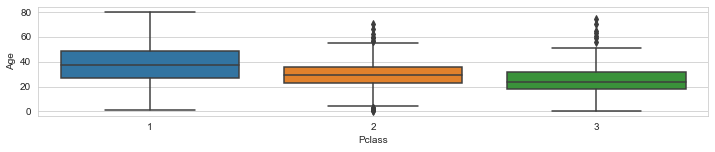

In [93]:
plt.figure(figsize=(12,2))
sns.boxplot(x="Pclass",y="Age",data=data)

In [94]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [95]:
data["Age"]=data[["Age","Pclass"]].apply(impute_age,axis=1)

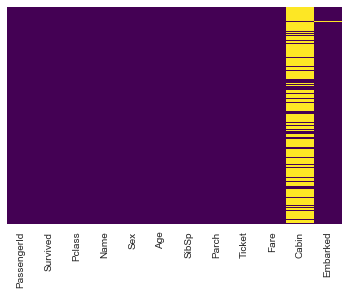

In [96]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [97]:
data.drop("Cabin",axis=1,inplace=True)

In [98]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# CONVERTING CATEGORICAL FEATURES

In [99]:
pd.get_dummies(data["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [100]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
embark=pd.get_dummies(data["Embarked"],drop_first=True)

In [101]:
data.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [102]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [103]:
data=pd.concat([data,sex,embark],axis=1)

In [104]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# LOGISTIC REGRESSION

In [105]:
data.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [106]:
data["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [108]:
x_train,x_test,y_train,y_test=train_test_split(data.drop("Survived",axis=1),data["Survived"],test_size=0.30,random_state=101)

# TRAINING AND PREDICTING

In [113]:
from sklearn.linear_model import LogisticRegression


In [114]:
lg=LogisticRegression()

In [115]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
lg.intercept_

array([3.20725609])

In [117]:
lg.coef_

array([[ 4.36873483e-04, -7.30793603e-01, -2.51612741e-02,
        -2.68494571e-01, -1.01085959e-01,  7.88934845e-03,
        -2.46551810e+00,  4.14898165e-02, -2.42928937e-01]])

In [118]:
lg.score(x_train,y_train)

0.8170144462279294

In [119]:
predictions=lg.predict(x_test)

In [120]:
from sklearn.metrics import confusion_matrix

In [122]:
accuracy=confusion_matrix(y_test,predictions)

In [123]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy=accuracy_score(y_test,predictions)

In [126]:
accuracy

0.7761194029850746